## House Price prediction Using Advanced Regression

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know :
- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

### Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Model Building 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# To get all columns in tabular form
pd.set_option('display.max_columns',81)
pd.set_option('display.max_rows',100)
pd.set_option('display.width', 100)

### Reading and Understanding Data

In [2]:
# Reading the Data
housing_df = pd.read_csv('train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Shape of the Data
housing_df.shape

(1460, 81)

In [4]:
# Checking for column details
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- There are 81 columns with 1460 records some of the columns have null values. They shall be addressed individually below.

In [5]:
# Looking the Dtatistical distribution of columns
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#To get an idea of the features and their data types
housing_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### Data Cleaning and Null value Analysis

In [7]:
# Duplicate analysis on 'Unique Identifier' columns
sum(housing_df.duplicated(subset = 'Id')) == 0

True

- There is no duplicate values present based on 'Id' column

In [8]:
# Checking null percentage values present in the dataset
round((housing_df.isnull().sum()/len(housing_df.index))*100,3).sort_values(ascending = False)

PoolQC           99.521
MiscFeature      96.301
Alley            93.767
Fence            80.753
FireplaceQu      47.260
LotFrontage      17.740
GarageCond        5.548
GarageType        5.548
GarageYrBlt       5.548
GarageFinish      5.548
GarageQual        5.548
BsmtExposure      2.603
BsmtFinType2      2.603
BsmtFinType1      2.534
BsmtCond          2.534
BsmtQual          2.534
MasVnrArea        0.548
MasVnrType        0.548
Electrical        0.068
Utilities         0.000
YearRemodAdd      0.000
MSSubClass        0.000
Foundation        0.000
ExterCond         0.000
ExterQual         0.000
Exterior2nd       0.000
Exterior1st       0.000
RoofMatl          0.000
RoofStyle         0.000
YearBuilt         0.000
LotConfig         0.000
OverallCond       0.000
OverallQual       0.000
HouseStyle        0.000
BldgType          0.000
Condition2        0.000
BsmtFinSF1        0.000
MSZoning          0.000
LotArea           0.000
Street            0.000
Condition1        0.000
Neighborhood    

In [9]:
# Columns having null values
housing_df.isnull().any().value_counts()

False    62
True     19
dtype: int64

**As per the data dictionary some of the columns have NA as valid entries which means the facility is not avaliable. It does not indicate a null vlaue. Hence can be misinterpreted if it is not appropraitely replaced.**

In [10]:
# From the Data Dictionary we can say some columns having Meaning full NA's so we cant condider them as missing values
# before going for null value analysis filling NA with None

col_with_meaningful_NA = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for column in col_with_meaningful_NA:
    housing_df[column]= housing_df[column].fillna('None')

In [11]:
# Checking the percentage of missing values
null_2 = housing_df.isnull().sum()/len(housing_df)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [12]:
# Handling 'LotFontage' column
housing_df.LotFrontage.isnull().sum()

259

In [13]:
housing_df.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [14]:
housing_df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

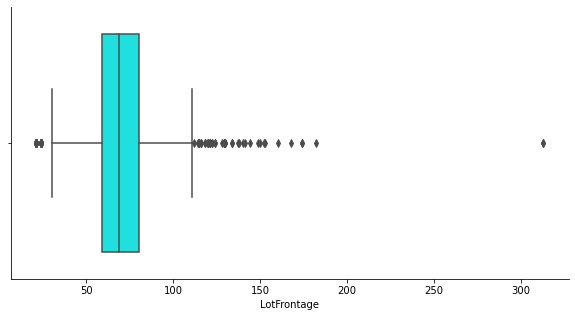

In [15]:
fig = plt.figure(figsize=(10, 5))

sns.boxplot(housing_df.LotFrontage,color = 'cyan')
sns.despine()
plt.show()

In [16]:
# Since there are lot outliers in the Data and missing value count is significant, it is best to drop the column
housing_df.drop("LotFrontage", axis=1, inplace=True)

In [17]:
# Check the 'GarageYrBlt' column
housing_df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [18]:
#Imputing null values with 0 as there are some properties with out garage
housing_df['GarageYrBlt'].fillna(0, inplace=True)

In [19]:
# Handling 'MasVnrArea' column
housing_df.MasVnrArea.isnull().sum()

8

In [20]:
housing_df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

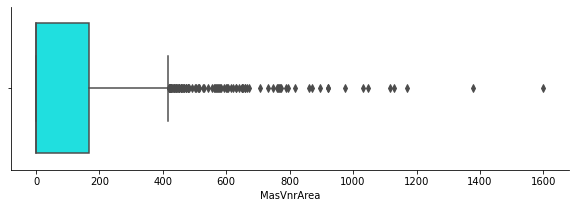

In [21]:
fig = plt.figure(figsize=(10, 3))

sns.boxplot(housing_df.MasVnrArea,color = 'cyan')
sns.despine()
plt.show()

In [22]:
housing_df.MasVnrArea.value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [23]:
#impute missing values of MasVnrArea with median 
housing_df.MasVnrArea = housing_df.MasVnrArea.fillna(housing_df.MasVnrArea.median())

In [24]:
# Handling Electrical --> Electrical system
housing_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [25]:
housing_df.Electrical.isnull().sum()

1

In [26]:
# Safe to impute one value with the mode
housing_df.Electrical = housing_df.Electrical.fillna('SBrkr')

In [27]:
missingPercentage = housing_df.isnull().sum() / housing_df.shape[0] * 100.00
missingPercentage.sort_values(ascending=False)

SalePrice        0.0
SaleCondition    0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
RoofStyle        0.0
YearRemodAdd     0.0
YearBuilt        0.0
Utilities        0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
OverallCond      0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
ScreenPorch      0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

- No more null values present in the dataset

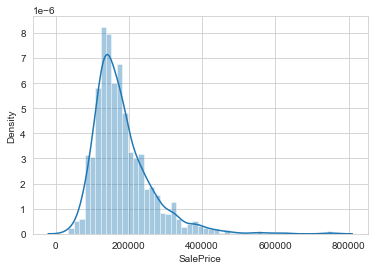

In [28]:
# lets check the distribution of the Target col
sns.set_style('whitegrid')
sns.distplot(housing_df['SalePrice'])
plt.show()

In [29]:
# Skewness
housing_df['SalePrice'].skew()

1.8828757597682129

In [30]:
# Kurtosis
housing_df['SalePrice'].kurt()

6.536281860064529

- From the above value it shows that it have high kurtosis.i.e, it doesn't lie between -3 and +3

In [31]:
# Creating a cloumn 'Transformedsaleprice' for the target variable
housing_df['TransformedSalePrice'] = np.log(housing_df['SalePrice'])

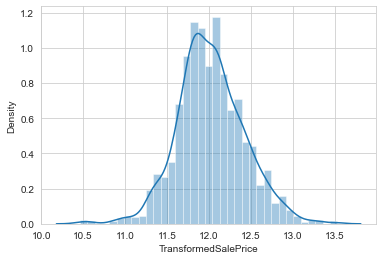

In [32]:
# Let's check the distribution of the target column again
sns.distplot(housing_df['TransformedSalePrice'])
plt.show()

**Dealing with data imbalance (categorical variables: object): Removing (object) categorical features that have more than 80% data associated to one single value.**

In [33]:
#Removing categorical features that have more than 80% data associated to one single value.

def get_cols_imbal(data, prcnt):
    housing_df1= data.copy()
    my_list= []
    cat_obj_cols = housing_df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(housing_df1[col].value_counts().max() > int(prcnt*len(housing_df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
columns_to_be_removed = get_cols_imbal(data=housing_df, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")

##Dropping columns with skewed data (object type categorical variables)
housing_df = housing_df.drop(columns_to_be_removed, axis=1)
housing_df.head()

Categorical object type columns removed: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Number of categorical object type columns removed:  24 



,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedSalePrice
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216


In [34]:
# Rechacking the shape of the Data
housing_df.shape

(1460, 57)

#### Derived Features

In [35]:
# Create a new column named 'WhetherRemodelled': This column would determine whether the house has been remodelled or not  
# based on 'YearBuilt' and 'YearRemodAdd'

def remodel_check(row):     # Based on the difference between remodelled and built year
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0            # Indicate not remodelled
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1            # Indicate remodelled
    else:
        return 2            # Any other observation
    
housing_df['WhetherRemodelled'] = housing_df.apply(remodel_check, axis = 1)
housing_df.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedSalePrice,WhetherRemodelled
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,0
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,0
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,1
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,1
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,0


In [36]:
#Confirmed: no wrong entries with value '2'. Hence, 0 if not remodelled and 1 if remodelled.
housing_df.WhetherRemodelled.value_counts()

0    764
1    696
Name: WhetherRemodelled, dtype: int64

In [37]:
#Derive a new variable named 'AgeofProperty' to determine the age of property since the built

def find_age_since_built(row):
    return row['YrSold'] - row['YearBuilt']

housing_df['AgeofProperty'] = housing_df.apply(find_age_since_built, axis = 1)
housing_df.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,0,5
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,0,31
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,1,7
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,1,91
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,0,8


In [38]:
# Dropping the original features. That are not required for analysis
# Dropping 'YrSold', 'GarageYrBlt', 'YearRemodAdd' and 'YearBuilt'
housing_df = housing_df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)
housing_df.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,208500,12.247694,0,5
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,181500,12.109011,0,31
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,223500,12.317167,1,7
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,0,2,140000,11.849398,1,91
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,250000,12.429216,0,8


**Dealing with data imbalance (numeric variables): Removing numeric attributes that have more than 80% data associated to one single value.**

In [39]:
#Removing numeric attributes that have more than 80% data associated to one single value.

def get_num_cols_imbal(data, prcnt):
    housing_df1= data.copy()
    my_list= []
    num_cols = housing_df1.select_dtypes(include=['int64','float64','int32','float32'])
    for col in (num_cols):
        if(housing_df1[col].value_counts().max() > int(prcnt*len(housing_df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
num_cols_to_be_removed = get_num_cols_imbal(data=housing_df, prcnt=80)  
print("Numeric columns removed:",num_cols_to_be_removed)
print("\nNumber of numeric columns removed: ", len(num_cols_to_be_removed),"\n")

##Dropping columns with skewed data (object type categorical variables)
housing_df = housing_df.drop(num_cols_to_be_removed, axis=1)
housing_df.head()

Numeric columns removed: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Number of numeric columns removed:  9 



,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,2,208500,12.247694,0,5
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,5,181500,12.109011,0,31
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,9,223500,12.317167,1,7
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,2,140000,11.849398,1,91
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,12,250000,12.429216,0,8


In [40]:
# Recheck the columns
housing_df.shape

(1460, 46)

In [41]:
#Removing 'Id' and 'MoSold' columns as they are not used for our analysis
housing_df = housing_df.drop(['Id', 'MoSold'], axis = 1)

In [42]:
# Numeric categorical variables
numeric_cat_cols = ['MSSubClass','MoSold','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
                    'TotRmsAbvGrd','Fireplaces','GarageCars','WhetherRemodelled']

#### Outlier Treatment

In [43]:
#Check outliers
housing_df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,12.024051,0.476712,36.547945
std,42.300571,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.399452,0.499629,30.250152
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,10.460242,0.000000,0.000000
10%,20.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,912.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,106475.000000,11.575665,0.000000,1.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,11.775097,0.000000,8.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,12.001505,0.000000,35.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,12.273731,1.000000,54.000000
95%,160.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,12.694958,1.000000,91.000000
98%,188.200000,25251.620000,9.000000,8.000000,650.820000,1442.640000,1678.200000,2001.640000,2072.280000,1318.560000,2782.380000,1.000000,3.000000,1.000000,4.000000,10.820000,2.000000,3.000000,907.460000,430.100000,240.820000,394931.060000,12.886466,1.000000,100.000000


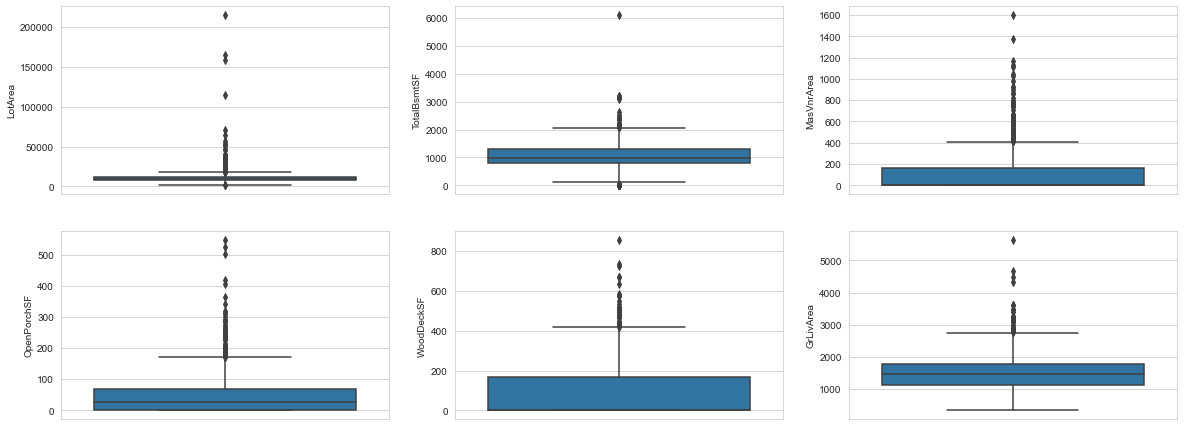

In [44]:
# Check the outliers in all the numeric columns (boxplot)

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = housing_df)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', data = housing_df)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea', data = housing_df)
plt.subplot(5,3,4)
sns.boxplot(y = 'OpenPorchSF', data = housing_df)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', data = housing_df)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea', data = housing_df)
plt.show()

In [45]:
def outlier_treatment(housing_df, col):
    
    Q1 = housing_df[col].quantile(0.25)

    Q3 = housing_df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    housing_df.loc[(housing_df[col] > higher_cap), col] = higher_cap
    #df.loc[(housing_df[col] < lower_cap), col] = lower_cap
    
    return housing_df

In [46]:
housing_df = outlier_treatment(housing_df,'LotArea')
housing_df = outlier_treatment(housing_df,'TotalBsmtSF')
housing_df = outlier_treatment(housing_df,'WoodDeckSF')
housing_df = outlier_treatment(housing_df,'OpenPorchSF')

In [47]:
# Determine the percentage of data retained

retained_data = round(100*(len(housing_df)/1460),2)
print(retained_data,"%")

100.0 %


#### Multivariate Analysis

[]

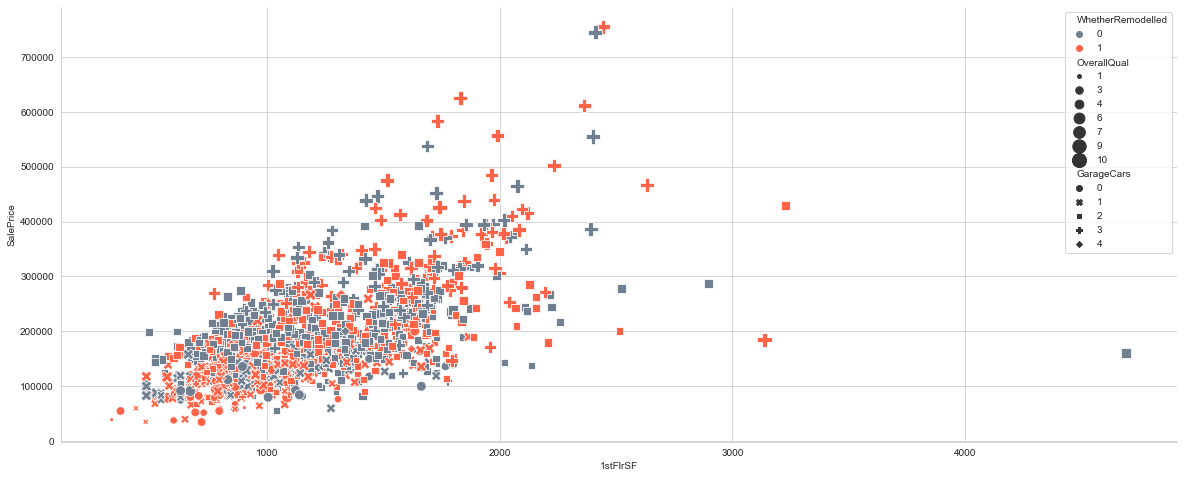

In [48]:
fig = plt.figure(figsize=(20, 8))

sns.scatterplot(x="1stFlrSF", y="SalePrice", hue ='WhetherRemodelled',
                data=housing_df, style="GarageCars",size="OverallQual", sizes=(15, 200),
                palette=["slategrey","tomato"] )

sns.despine()

plt.plot()

- Non-remodelled houses sell "reasonably" well too
- 3 Garage cars are very popular among buyers
- Price increases as 1st Floor surface area increases

<Figure size 1440x1200 with 0 Axes>

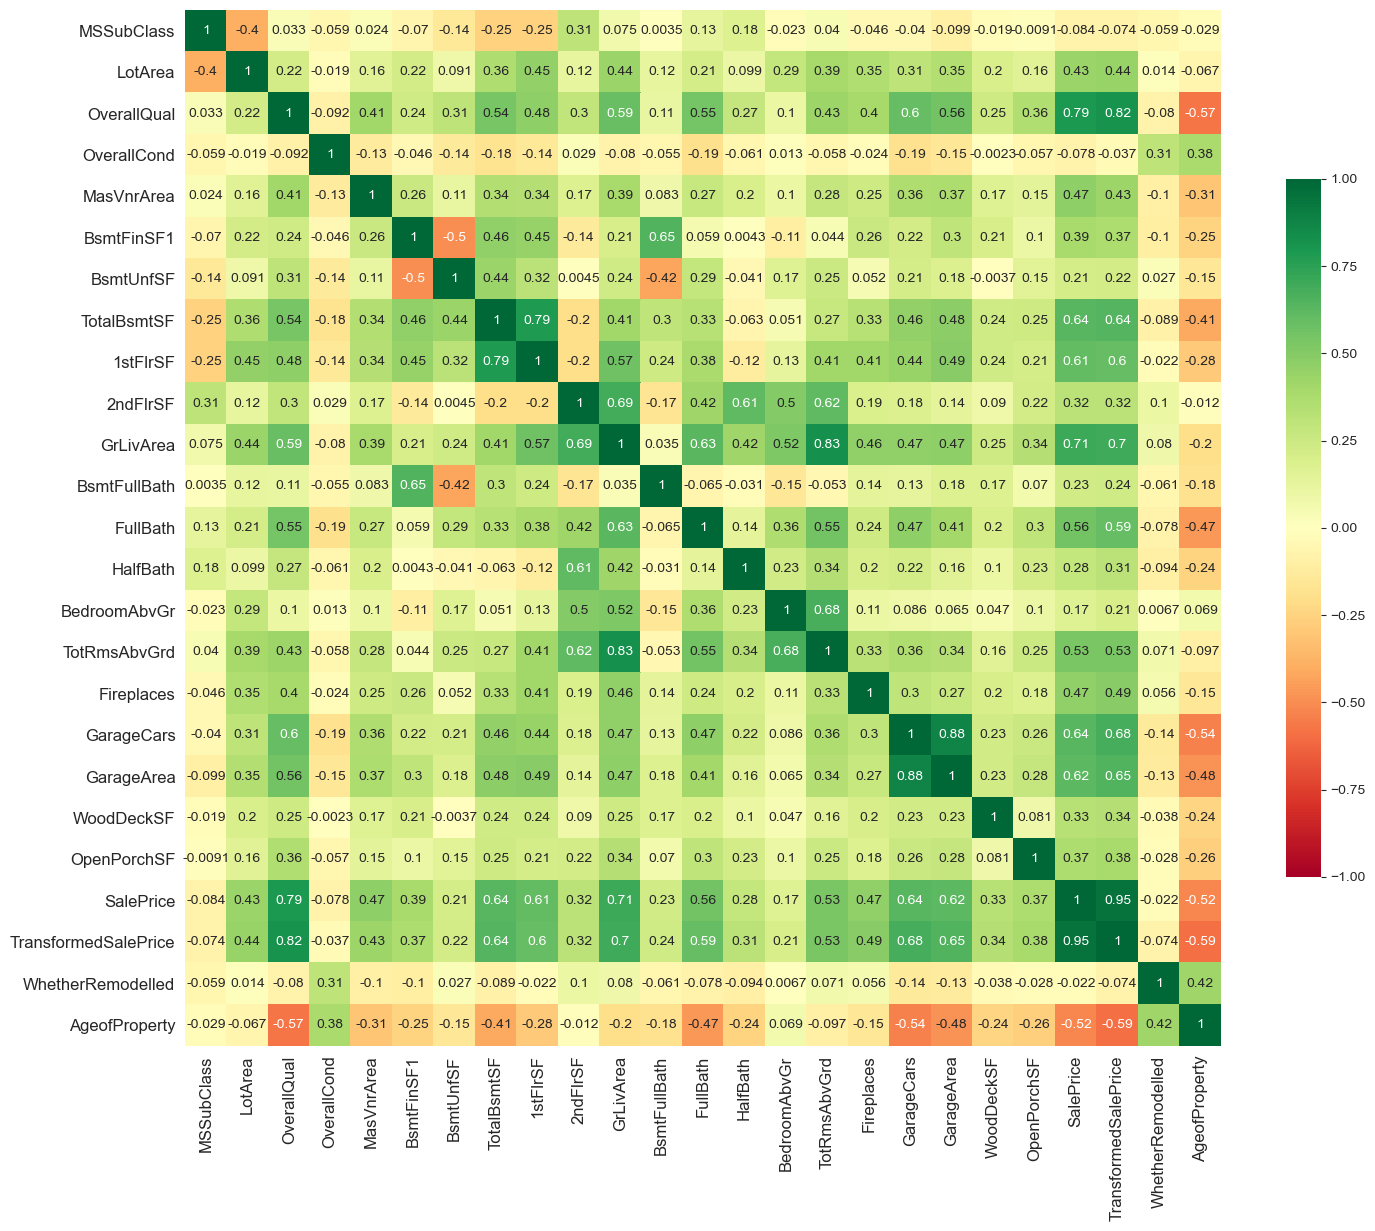

In [49]:
#Rechecking the heatmap to understand correlation amongst all numeric variables (ignore the categorical numeric ones)
numeric_vars1= housing_df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new1 = housing_df[numeric_vars1].corr()
f, ax_corr2 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr2 = sns.heatmap(corr_matrix_new1, cmap= 'RdYlGn', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.autoscale()
plt.show()

**Inferences**
- The predictors 'GrLivArea' and 'TotRmsAbvGrd' shows (0.83) strong positive correlation. Hence, dropping 'TotRmsAbvGrd'.
- The predictors 'GarageCars' and 'GarageArea' shows (0.88) strong positive correlation. Hence, dropping 'GarageCars'.
- The predictors 'GrLivArea' and '2ndFlrSF' shows (0.69) strong positive correlation. Hence, dropping '2ndFlrSF'.
- The predictors '1stFlrSF' and 'TotalBsmtSF' shows (0.79) strong positive correlation. Hence, dropping '1stFlrSF'.

In [50]:
##Removing the highly correlated predictors to reduce multicollinearity.

housing_df.drop(['TotRmsAbvGrd', 'GarageCars', '2ndFlrSF', '1stFlrSF'], axis = 1, inplace = True)

<Figure size 1440x1200 with 0 Axes>

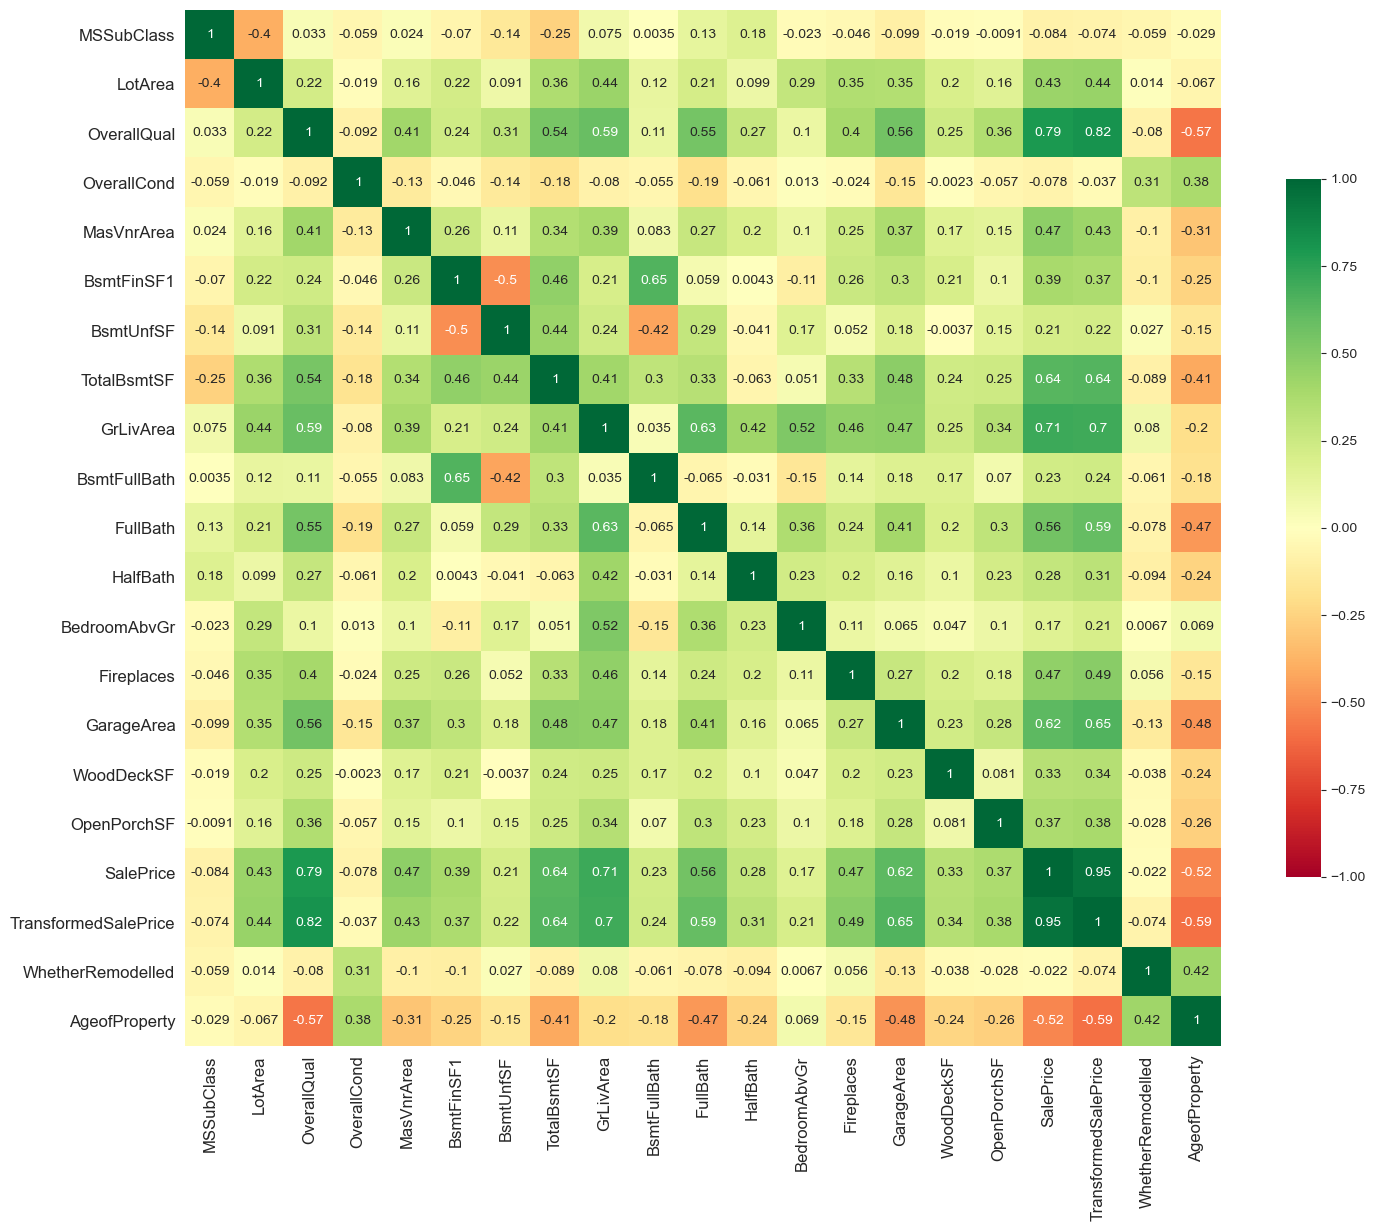

In [51]:
#Rechecking the heatmap to understand correlation amongst all numeric variables (ignore the categorical numeric ones)
numeric_vars1= housing_df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new1 = housing_df[numeric_vars1].corr()
f, ax_corr2 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr2 = sns.heatmap(corr_matrix_new1, cmap= 'RdYlGn', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.autoscale()
plt.show()

###  Data Preparation

**Using Data Dictionary, to convert the categorical variables into numeric variables**

In [52]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

##For ordinals, let's assign them their respective weights.
housing_df['d_LotShape'] = housing_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
housing_df['d_ExterQual'] = housing_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_df['d_BsmtQual'] = housing_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

housing_df['d_BsmtExposure'] = housing_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_df['d_BsmtFinType1'] = housing_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housing_df['d_HeatingQC'] = housing_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

housing_df['d_KitchenQual'] = housing_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['d_FireplaceQu'] = housing_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['d_GarageFinish'] = housing_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

housing_df = housing_df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
                                'KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1)
housing_df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish
0,60,RL,8450.0,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,PConc,706,150,856.0,1710,1,2,1,3,0,Attchd,548,0.0,61.0,208500,12.247694,0,5,3,4,4,1,6,5,4,0,2
1,20,RL,9600.0,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,CBlock,978,284,1262.0,1262,0,2,0,3,1,Attchd,460,298.0,0.0,181500,12.109011,0,31,3,3,4,4,5,5,3,3,2
2,60,RL,11250.0,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,PConc,486,434,920.0,1786,1,2,1,3,1,Attchd,608,0.0,42.0,223500,12.317167,1,7,2,4,4,2,6,5,4,3,2
3,70,RL,9550.0,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,540,756.0,1717,1,1,0,3,1,Detchd,642,0.0,35.0,140000,11.849398,1,91,2,3,3,1,5,4,4,4,1
4,60,RL,14260.0,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,PConc,655,490,1145.0,2198,1,2,1,4,1,Attchd,836,192.0,84.0,250000,12.429216,0,8,2,4,4,3,6,5,4,3,2


#### Creating Dummy Variables

In [53]:
#Creating dummies for nominal variables


##Creating dummies for 'MSSubClass'
d_MSSubClass = pd.get_dummies(housing_df['MSSubClass'], prefix='MSSubClass', drop_first = True)
housing_df = pd.concat([housing_df, d_MSSubClass], axis = 1)

##Creating dummies for 'LotConfigs'
d_LotConfigs = pd.get_dummies(housing_df['LotConfig'], prefix='LotConfig', drop_first = True)
housing_df = pd.concat([housing_df, d_LotConfigs], axis = 1)

##Creating dummies for 'MSZoning'
d_MSZoning = pd.get_dummies(housing_df['MSZoning'], prefix='MSZoning', drop_first = True)
housing_df = pd.concat([housing_df, d_MSZoning], axis = 1)

##Creating dummies for 'Neighborhood'
d_Neighborhood = pd.get_dummies(housing_df['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_df = pd.concat([housing_df, d_Neighborhood], axis = 1)

##Creating dummies for 'Exterior2nd'
d_Exterior2nd = pd.get_dummies(housing_df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_df = pd.concat([housing_df, d_Exterior2nd], axis = 1)

##Creating dummies for 'HouseStyle'
d_HouseStyle = pd.get_dummies(housing_df['HouseStyle'], prefix='HouseStyle', drop_first = True)
housing_df = pd.concat([housing_df, d_HouseStyle], axis = 1)

##Creating dummies for 'Foundation'
d_Foundation = pd.get_dummies(housing_df['Foundation'], prefix='Foundation', drop_first = True)
housing_df = pd.concat([housing_df, d_Foundation], axis = 1)

##Creating dummies for 'MasVnrType'
d_MasVnrType = pd.get_dummies(housing_df['MasVnrType'], prefix='MasVnrTyp', drop_first = True)
housing_df = pd.concat([housing_df, d_MasVnrType], axis = 1)

##Creating dummies for 'RoofStyle'
d_RoofStyle = pd.get_dummies(housing_df['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_df = pd.concat([housing_df, d_RoofStyle], axis = 1)

##Creating dummies for 'Exterior1st'
d_Exterior1st = pd.get_dummies(housing_df['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_df = pd.concat([housing_df, d_Exterior1st], axis = 1)

##Creating dummies for 'GarageType'
d_GarageType = pd.get_dummies(housing_df['GarageType'], prefix='GarageType', drop_first = True)
housing_df = pd.concat([housing_df, d_GarageType], axis = 1)


##Dropping columns for which we have created dummies, as we now have new columns derived from these columns
orig_before_dum_cols = ['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation',
              'GarageType',  'LotConfig' ,'HouseStyle', 'MasVnrType']
housing_df = housing_df.drop(orig_before_dum_cols, axis=1)

In [54]:
housing_df.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TransformedSalePrice,WhetherRemodelled,AgeofProperty,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrTyp_BrkFace,MasVnrTyp_None,MasVnrTyp_Stone,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,8450.0,7,5,196.0,706,150,856.0,1710,1,2,1,3,0,548,0.0,61.0,208500,12.247694,0,5,3,4,4,1,6,5,4,0,2,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,9600.0,6,8,0.0,978,284,1262.0,1262,0,2,0,3,1,460,298.0,0.0,181500,12.109011,0,31,3,3,4,4,5,5,3,3,2,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,11250.0,7,5,162.0,486,434,920.0,1786,1,2,1,3,1,608,0.0,42.0,223500,12.317167,1,7,2,4,4,2,6,5,4,3,2,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,9550.0,7,5,0.0,216,540,756.0,1717,1,1,0,3,1,642,0.0,35.0,140000,11.849398,1,91,2,3,3,1,5,4,4,4,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,14260.0,8,5,350.0,655,490,1145.0,2198,1,2,1,4,1,836,192.0,84.0,250000,12.429216,0,8,2,4,4,3,6,5,4,3,2,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [55]:
##Rechecking and eliminating those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.
housing_df_corr = housing_df.drop(['SalePrice','TransformedSalePrice'], axis = 1)
my_corr_matrix = housing_df_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k = 1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.75)] # Reduce multicolinearity if any
col_to_drop   # columns to drop from housing_df. Independent predictor highly corelated to each other

['d_FireplaceQu',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SLvl',
 'Foundation_PConc',
 'MasVnrTyp_None',
 'RoofStyle_Hip',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng']

In [56]:
# Dropping independent predictor hihgly corelated to each other
housing_df = housing_df.drop(col_to_drop, axis = 1)

In [57]:
# Rechecking the model
housing_df.shape

(1460, 113)

In [58]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 113 entries, LotArea to GarageType_None
dtypes: float64(6), int64(22), uint8(85)
memory usage: 440.7 KB


- Now we have all the columns with numerical data

In [59]:
#Creating a function to find binary value columns from the 'housing_df' dataframe (if any)
def binary_val_cols(housing_df):
    housing_df1 = housing_df.copy()
    dualsvcol = (housing_df1.nunique()  == 2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(housing_df)
print(binary_cols)

['WhetherRemodelled', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Ext

#### Train test split

In [60]:
np.random.seed(0)
housing_df_train, housing_df_test = train_test_split(housing_df, train_size=0.7, test_size = 0.3, random_state=100)

In [61]:
##Dataframe with binary columns
housing_df_binary_train = housing_df_train.loc[:, binary_cols]
housing_df_binary_test = housing_df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
housing_df_train = housing_df_train.drop(binary_cols, axis=1)
housing_df_test = housing_df_test.drop(binary_cols, axis=1)

#### Scallingthe data

In [62]:
#StandardScaler
all_cols = housing_df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
housing_df_train[all_cols] = scaler.fit_transform(housing_df_train[all_cols])
#concat dummies:Train set
housing_df_train = pd.concat([housing_df_train, housing_df_binary_train], axis=1)

# Scaler fot_transform on test data
housing_df_test[all_cols] = scaler.transform(housing_df_test[all_cols])
#concat dummies:Test set
housing_df_test = pd.concat([housing_df_test, housing_df_binary_test], axis=1)

In [63]:
housing_df_train.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TransformedSalePrice,AgeofProperty,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_GarageFinish,WhetherRemodelled,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrTyp_BrkFace,MasVnrTyp_Stone,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior1st_Stone,Exterior1st_WdShing,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
210,-1.117162,-0.779861,0.383154,-0.558025,0.043512,-0.374367,-0.456947,-1.228053,1.066863,-1.026085,-0.751723,-1.042717,-0.925422,-2.217786,-0.777334,-0.814228,-1.042855,-1.335437,1.529604,0.692628,-0.698260,-0.532226,-0.605626,-0.279557,-1.179071,-0.776063,-1.902619,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
318,0.081095,0.649651,-0.533005,0.809137,1.160345,-0.454644,0.722974,2.123103,1.066863,0.786428,1.246998,1.396261,0.623522,0.867506,2.153201,0.323641,1.006390,1.125545,-0.677573,0.692628,1.053395,0.579028,2.146648,1.140483,0.873498,0.741868,0.321278,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
239,-0.242178,-0.065105,-1.449164,-0.558025,-0.761296,0.171964,-0.772081,-0.056465,-0.837450,-1.026085,1.246998,0.176772,0.623522,-1.183084,-0.777334,1.840799,-0.853110,-0.976219,0.936631,0.692628,-0.698260,-0.532226,-0.605626,-0.752904,-1.179071,-0.776063,-0.790670,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
986,-1.199166,-0.065105,2.215472,-0.558025,-0.963574,-0.175904,-1.382806,0.221858,-0.837450,-1.026085,-0.751723,-1.042717,-0.925422,-1.018473,2.618639,-0.814228,-0.802511,-0.888480,1.957862,0.692628,-0.698260,-0.532226,-0.605626,-1.226251,-0.152787,0.741868,-0.790670,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1416,0.482745,-1.494617,0.383154,-0.558025,-0.963574,0.475233,-0.669479,1.453624,-0.837450,0.786428,-0.751723,1.396261,-0.925422,0.416000,-0.777334,-0.814228,-0.732938,-0.772616,2.913207,0.692628,-0.698260,-0.532226,-0.605626,-1.226251,-0.152787,-0.776063,-0.790670,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [64]:
print(housing_df_train.shape)
print(housing_df_test.shape)

(1021, 113)
(438, 113)


### Model Building

#### Linear Regression

In [65]:
# Preparing Test and Train Set
X_train = housing_df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).values
y_train = housing_df_train['TransformedSalePrice'].values

X_test = housing_df_test.drop(['SalePrice','TransformedSalePrice'], axis=1).values
y_test = housing_df_test['TransformedSalePrice'].values

In [66]:
# Linear regression with all predictors
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [67]:
# predictions
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9166695747145925
-1.7578030287906726e+23
85.08036421640101
8.059123606340972e+25
0.08333042528540745
1.8399825585253363e+23


In [68]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.2780787609072178
[ 7.81332223e-02  1.70199884e-01  1.34548516e-01  6.76540974e-03
 -1.69047328e-01 -1.81396223e-01  3.09177882e-01  1.88150635e-01
  3.92722514e-02  6.36147874e-02  5.48055493e-02  1.16410369e-02
  5.56019001e-02  7.70079424e-02  2.16543318e-02  1.32396064e-02
 -1.64330717e-01  2.42042827e-02 -6.78723690e-03  2.47911588e-02
  3.25221712e-02  5.35591513e-02  2.53002354e-02  4.72588801e-02
  2.96449179e-02  1.35234803e-02 -2.01746194e-01 -1.45687797e-01
 -1.21206744e-01  8.33172298e-03 -8.63107424e-02  1.75685037e-01
  2.58269421e-01 -1.01048165e-01  2.59076313e-02 -1.02011355e-01
 -1.23295473e-01 -3.11782572e-01 -1.60622128e-01 -7.66948479e-02
  9.23904680e-02 -1.07351014e-01 -1.66747695e-01  4.69259440e-03
  2.25796025e-01  1.47150177e-01  8.03494973e-02 -2.19667451e-01
 -2.27758287e-01 -6.27809671e-02  3.34970019e-02 -1.48713632e-01
  1.53675820e-01 -2.97087591e-01 -8.23319934e-02 -3.81244241e-01
 -4.97306853e-01 -2.07520165e-01 -2.15429889e-01 -1.66353484e-01
 -2.3

### Performing Ridge Regression( L2 Regularization )

In [69]:
# List of alpha
params = {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,
         6.0,7.0,8.0,9.0,10.0,20.0,50.0,100.0,500.0,1000.0]}
print(params)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}


In [70]:
# Using cross validation to tune hyperparameter alpha in ridge regression

ridge = Ridge()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20.0}


In [72]:
# Creating the grid search results as a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004797,0.001325,0.001000,0.000002,0.0001,{'alpha': 0.0001},-0.236983,-0.230667,-0.249956,-0.216107,-0.239710,-0.234685,0.011180,26,-0.201244,-0.187887,-0.189354,-0.206741,-0.201577,-0.197361,0.007412
1,0.002800,0.000402,0.000400,0.000490,0.001,{'alpha': 0.001},-0.236973,-0.230651,-0.249950,-0.216073,-0.239705,-0.234671,0.011191,25,-0.201245,-0.187889,-0.189354,-0.206743,-0.201576,-0.197361,0.007412
2,0.002599,0.000488,0.000799,0.000399,0.01,{'alpha': 0.01},-0.236875,-0.230503,-0.249893,-0.215750,-0.239654,-0.234535,0.011284,24,-0.201259,-0.187902,-0.189357,-0.206757,-0.201563,-0.197367,0.007412
3,0.002799,0.000399,0.000799,0.000748,0.05,{'alpha': 0.05},-0.236478,-0.229909,-0.249655,-0.214732,-0.239445,-0.234044,0.011566,23,-0.201352,-0.187972,-0.189397,-0.206814,-0.201503,-0.197408,0.007403
4,0.002599,0.000489,0.000599,0.000489,0.1,{'alpha': 0.1},-0.236005,-0.229291,-0.249397,-0.213748,-0.239207,-0.233530,0.011827,22,-0.201507,-0.188132,-0.189449,-0.206870,-0.201435,-0.197479,0.007375


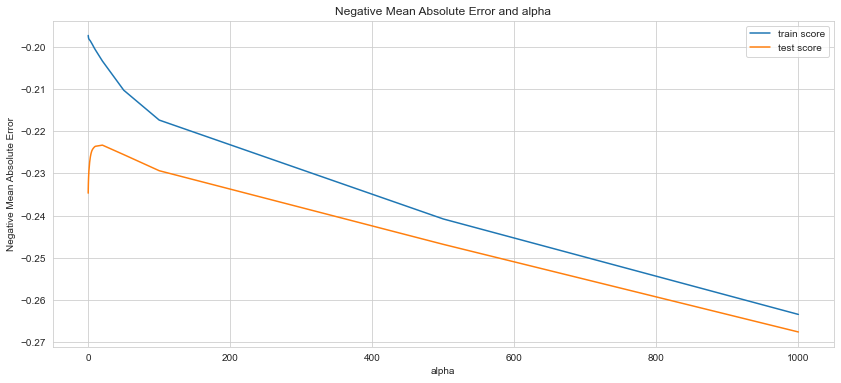

In [73]:
# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.figure(figsize=(14,6))

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20

ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [75]:
ridge.coef_

array([ 9.34969258e-02,  2.05866687e-01,  1.29342081e-01,  1.54978469e-02,
       -1.30914404e-01, -1.36710476e-01,  2.54405796e-01,  1.79731870e-01,
        4.07333160e-02,  7.11587426e-02,  5.58723123e-02,  2.66820394e-02,
        6.24860841e-02,  8.00357094e-02,  2.38902593e-02,  1.57276764e-02,
       -1.59214535e-01,  1.75445559e-02,  1.37655614e-02,  1.15548392e-02,
        3.11178733e-02,  5.50672945e-02,  3.26119754e-02,  5.59352907e-02,
        3.48846592e-02,  1.97061572e-02, -1.41475839e-01, -1.98752886e-02,
       -1.38439868e-02,  3.60074107e-02, -2.21374547e-02,  1.38075906e-01,
        3.77633962e-02, -2.26908363e-02,  9.16444952e-03, -2.52459508e-02,
       -1.81776752e-02, -1.06377320e-01, -4.09465497e-02, -3.05697557e-02,
        7.55605441e-02, -6.22333574e-02, -1.54316355e-02,  5.39872912e-03,
        1.62815310e-01,  5.59952126e-02,  9.58035391e-02, -6.61149796e-03,
       -4.97600675e-02,  5.69015236e-02,  7.92160206e-02, -6.20787679e-02,
        1.70578974e-01, -

In [76]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): ",end="")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): ",end="")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE (Train): ",end="")
print(mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE (Test): ",end="")
print(mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R2 score (Train): 0.9089164590423067
R2 score (Test): 0.8877427463312839
RSS (Train): 92.99629531780488
RSS (Test): 51.46737536611059
RMSE (Train): 0.3018004986041165
RMSE (Test): 0.34279064049401664


In [77]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = housing_df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.254, 'TotalBsmtSF'),
 (0.206, 'OverallQual'),
 (0.18, 'GrLivArea'),
 (0.171, 'Neighborhood_Crawfor'),
 (0.163, 'MSZoning_FV'),
 (-0.159, 'AgeofProperty'),
 (-0.141, 'MSSubClass_30'),
 (-0.14, 'Neighborhood_Edwards'),
 (0.138, 'MSSubClass_70'),
 (-0.137, 'BsmtUnfSF'),
 (-0.131, 'BsmtFinSF1'),
 (0.129, 'OverallCond'),
 (-0.127, 'Neighborhood_IDOTRR'),
 (0.124, 'Neighborhood_NridgHt'),
 (0.116, 'Exterior1st_BrkFace'),
 (0.108, 'Neighborhood_NoRidge'),
 (-0.106, 'MSSubClass_160'),
 (-0.101, 'constant'),
 (0.096, 'MSZoning_RL'),
 (0.095, 'Neighborhood_StoneBr'),
 (0.093, 'LotArea'),
 (-0.088, 'Neighborhood_MeadowV'),
 (-0.087, 'Neighborhood_Sawyer'),
 (0.085, 'Foundation_Slab'),
 (0.08, 'GarageArea'),
 (0.079, 'Neighborhood_ClearCr'),
 (-0.078, 'Neighborhood_NWAmes'),
 (0.076, 'LotConfig_CulDSac'),
 (0.071, 'FullBath'),
 (-0.069, 'GarageType_CarPort'),
 (0.063, 'GarageType_Attchd'),
 (0.062, 'Fireplaces'),
 (-0.062, 'LotConfig_FR2'),
 (-0.062, 'Neighborhood_CollgCr'),
 (-0.061, 'Foundat

In [78]:
# Creating a dataframe for the features with coefficients
ridge_coef = pd.DataFrame(list(zip(cols,model_parameters)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
7,TotalBsmtSF,0.254
2,OverallQual,0.206
8,GrLivArea,0.180
53,Neighborhood_Crawfor,0.171
45,MSZoning_FV,0.163
32,MSSubClass_70,0.138
3,OverallCond,0.129
63,Neighborhood_NridgHt,0.124
102,Exterior1st_BrkFace,0.116
62,Neighborhood_NoRidge,0.108


### Performing Lasso Regression( L1 Regularization )

In [79]:
# Lasso
lasso = Lasso()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Print the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [81]:
# Creating the grid search results as a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039175,0.007436,0.000400,0.00049,0.0001,{'alpha': 0.0001},-0.233442,-0.227012,-0.247211,-0.213754,-0.239301,-0.232144,0.011353,2,-0.202219,-0.188662,-0.189746,-0.207014,-0.201738,-0.197876,0.007325
1,0.008592,0.000490,0.000400,0.00049,0.001,{'alpha': 0.001},-0.224032,-0.223373,-0.242398,-0.202317,-0.232194,-0.224863,0.013209,1,-0.206912,-0.193321,-0.192240,-0.210259,-0.202388,-0.201024,0.007188
2,0.005396,0.000490,0.000600,0.00049,0.01,{'alpha': 0.01},-0.222151,-0.248099,-0.248664,-0.200697,-0.244911,-0.232904,0.018849,3,-0.231975,-0.213516,-0.217769,-0.231892,-0.224467,-0.223924,0.007414
3,0.004396,0.000489,0.000400,0.00049,0.05,{'alpha': 0.05},-0.223383,-0.270024,-0.256461,-0.210433,-0.261439,-0.244348,0.023185,4,-0.247018,-0.224578,-0.234026,-0.251323,-0.245356,-0.240460,0.009784
4,0.004197,0.000399,0.000799,0.00040,0.1,{'alpha': 0.1},-0.256206,-0.307163,-0.284286,-0.254502,-0.299854,-0.280402,0.021752,5,-0.283388,-0.261615,-0.271545,-0.285959,-0.282793,-0.277060,0.009177


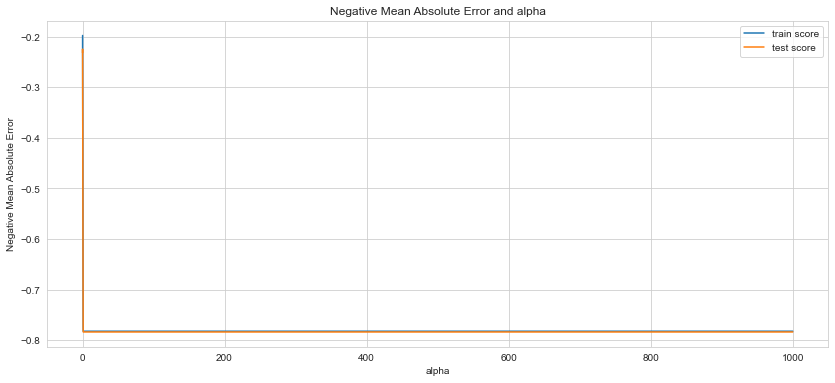

In [82]:
# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.figure(figsize=(14,6))

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [83]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised
alpha = 0.001

lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [84]:
lasso.coef_

array([ 0.08733626,  0.19678834,  0.13789487,  0.01207246, -0.15892245,
       -0.17173603,  0.30430853,  0.18960489,  0.03564506,  0.06195632,
        0.05219247,  0.01956848,  0.05924119,  0.07403967,  0.02281746,
        0.01346891, -0.17555817,  0.01940463,  0.00628744,  0.00459044,
        0.02816458,  0.04853392,  0.02948314,  0.05102939,  0.03341122,
        0.01555571, -0.16454842, -0.        , -0.        ,  0.04883101,
       -0.        ,  0.18870583,  0.06251749, -0.        ,  0.        ,
       -0.01191102, -0.02132196, -0.1708317 , -0.        , -0.        ,
        0.07830469, -0.05977635, -0.        ,  0.00145169,  0.2920789 ,
        0.06303926,  0.10888384, -0.        , -0.        ,  0.06243969,
        0.10404766, -0.03794855,  0.24176503, -0.15882278,  0.        ,
       -0.16951281, -0.18020556, -0.05324283, -0.05856449,  0.        ,
       -0.08089693,  0.18910471,  0.20858275, -0.04837154,  0.        ,
       -0.10706961, -0.0360384 ,  0.20498985,  0.        ,  0.  

In [85]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): ",end="")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): ",end="")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE (Train): ",end="")
print(mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE (Test): ",end="")
print(mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R2 score (Train): 0.9118083801751554
R2 score (Test): 0.8902734628437702
RSS (Train): 90.0436438411663
RSS (Test): 50.30709990562474
RMSE (Train): 0.29697073900444226
RMSE (Test): 0.3389046952737529


In [86]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = housing_df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.304, 'TotalBsmtSF'),
 (0.292, 'MSZoning_FV'),
 (0.242, 'Neighborhood_Crawfor'),
 (0.209, 'Neighborhood_NridgHt'),
 (0.205, 'Neighborhood_StoneBr'),
 (0.197, 'OverallQual'),
 (0.19, 'GrLivArea'),
 (0.189, 'MSSubClass_70'),
 (0.189, 'Neighborhood_NoRidge'),
 (0.182, 'Exterior1st_BrkFace'),
 (-0.18, 'Neighborhood_MeadowV'),
 (-0.176, 'AgeofProperty'),
 (-0.172, 'BsmtUnfSF'),
 (-0.171, 'MSSubClass_160'),
 (-0.17, 'Neighborhood_IDOTRR'),
 (-0.165, 'MSSubClass_30'),
 (-0.159, 'BsmtFinSF1'),
 (-0.159, 'Neighborhood_Edwards'),
 (-0.143, 'GarageType_CarPort'),
 (0.138, 'OverallCond'),
 (0.127, 'Foundation_Slab'),
 (-0.123, 'constant'),
 (0.109, 'MSZoning_RL'),
 (-0.107, 'Neighborhood_Sawyer'),
 (0.104, 'Neighborhood_ClearCr'),
 (0.087, 'LotArea'),
 (-0.081, 'Neighborhood_NWAmes'),
 (0.078, 'LotConfig_CulDSac'),
 (0.074, 'GarageArea'),
 (0.068, 'Exterior2nd_VinylSd'),
 (0.063, 'MSSubClass_75'),
 (0.063, 'MSZoning_RH'),
 (0.062, 'FullBath'),
 (0.062, 'Neighborhood_BrkSide'),
 (-0.06, 'LotConf

In [87]:
# Creating a dataframe for the features with coefficients
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
7,TotalBsmtSF,0.304
45,MSZoning_FV,0.292
53,Neighborhood_Crawfor,0.242
63,Neighborhood_NridgHt,0.209
68,Neighborhood_StoneBr,0.205
2,OverallQual,0.197
8,GrLivArea,0.190
32,MSSubClass_70,0.189
62,Neighborhood_NoRidge,0.189
102,Exterior1st_BrkFace,0.182


### Conclusion

- From the above two techniques of Lasso and Ridge Regression, we can say that both almost having the same r2 value.
- When comparing the complexity, it is better to use Lasso because, Lasso will make the feature selection among the present variables, but Ridge will not reduce columns, it will keep all variables with the reducing the coefficient of variables.

## Subjective Question and Answer

#### Question-1
**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

#### Answer:

In [88]:
#Fitting Ridge model for alpha = 40 and printing coefficients which have been penalised

alpha = 40.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 9.63181941e-02  2.09745580e-01  1.24001216e-01  1.76990749e-02
 -1.02843103e-01 -1.05706154e-01  2.22422897e-01  1.69825757e-01
  4.24792262e-02  7.46193198e-02  5.60679535e-02  3.17457864e-02
  6.60351849e-02  8.23128269e-02  2.51656694e-02  1.66857727e-02
 -1.43951879e-01  1.38004736e-02  2.06517965e-02  1.50577033e-02
  3.10184317e-02  5.50429393e-02  3.65530441e-02  6.09898564e-02
  3.92530294e-02  1.99298046e-02 -1.13898971e-01 -1.02130130e-02
 -8.78468818e-03  2.83540602e-02 -1.73018054e-02  1.02756571e-01
  1.90115943e-02 -1.77810389e-02  1.32697886e-03 -1.54067562e-02
 -1.24510661e-03 -6.75722898e-02 -2.45931166e-02 -2.33784086e-02
  6.16677030e-02 -4.60942405e-02 -7.06365239e-03  4.74097293e-03
  1.10908920e-01  3.32283480e-02  8.17265925e-02 -3.29563636e-03
 -3.45809706e-02  4.27181934e-02  5.85349551e-02 -4.85486546e-02
  1.29984639e-01 -1.11205129e-01 -1.75908305e-02 -9.23633931e-02
 -5.20623886e-02 -3.30093164e-02 -2.56269242e-02 -4.55556080e-03
 -5.26394054e-02  7.49710

In [89]:
# Lets calculate some metrics such as R2 score
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)
metric2.append(r2_test_lr)

R2 score (Train): 0.903875901305912
R2 score (Test): 0.8859112415222788


In [90]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = housing_df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.222, 'TotalBsmtSF'),
 (0.21, 'OverallQual'),
 (0.17, 'GrLivArea'),
 (-0.144, 'AgeofProperty'),
 (0.13, 'Neighborhood_Crawfor'),
 (0.124, 'OverallCond'),
 (-0.114, 'MSSubClass_30'),
 (0.111, 'MSZoning_FV'),
 (-0.111, 'Neighborhood_Edwards'),
 (-0.106, 'BsmtUnfSF'),
 (-0.103, 'BsmtFinSF1'),
 (0.103, 'MSSubClass_70'),
 (0.096, 'LotArea'),
 (-0.092, 'Neighborhood_IDOTRR'),
 (0.09, 'Neighborhood_NridgHt'),
 (0.085, 'Exterior1st_BrkFace'),
 (0.082, 'GarageArea'),
 (0.082, 'MSZoning_RL'),
 (-0.075, 'constant'),
 (0.075, 'FullBath'),
 (0.075, 'Neighborhood_NoRidge'),
 (-0.068, 'MSSubClass_160'),
 (0.066, 'Fireplaces'),
 (0.062, 'LotConfig_CulDSac'),
 (0.061, 'd_KitchenQual'),
 (0.059, 'Neighborhood_ClearCr'),
 (-0.059, 'Neighborhood_Sawyer'),
 (-0.059, 'Foundation_CBlock'),
 (0.057, 'Neighborhood_StoneBr'),
 (0.056, 'HalfBath'),
 (0.055, 'd_BsmtFinType1'),
 (0.054, 'Foundation_Slab'),
 (0.054, 'GarageType_Attchd'),
 (-0.053, 'Neighborhood_NWAmes'),
 (-0.052, 'Neighborhood_MeadowV'),
 (-0.0

In [91]:
# Creating a dataframe for the features with coefficients
ridge_coef = pd.DataFrame(list(zip(cols,model_parameters)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
7,TotalBsmtSF,0.222
2,OverallQual,0.210
8,GrLivArea,0.170
53,Neighborhood_Crawfor,0.130
3,OverallCond,0.124
45,MSZoning_FV,0.111
32,MSSubClass_70,0.103
1,LotArea,0.096
63,Neighborhood_NridgHt,0.090
102,Exterior1st_BrkFace,0.085


In [92]:
#Fitting Lasso model for alpha = 0.002 and printing coefficients which have been penalised

alpha = 0.002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 8.91192586e-02  2.15148362e-01  1.33609787e-01  1.30682879e-02
 -1.47828488e-01 -1.59879893e-01  2.91880862e-01  1.94677949e-01
  3.59725729e-02  6.07995251e-02  4.73475878e-02  2.04564413e-02
  6.16986155e-02  7.31308693e-02  2.27462790e-02  1.18983376e-02
 -1.71244849e-01  1.41642209e-02  1.11076545e-02  0.00000000e+00
  2.56666268e-02  4.59243003e-02  3.20311722e-02  5.14895942e-02
  3.80123728e-02  1.48704624e-02 -1.42499911e-01 -0.00000000e+00
 -0.00000000e+00  3.06573801e-02 -0.00000000e+00  1.50878559e-01
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.13702294e-01 -0.00000000e+00 -0.00000000e+00
  6.42211328e-02 -2.82477171e-02 -0.00000000e+00  0.00000000e+00
  2.56283781e-01  0.00000000e+00  1.07327346e-01 -0.00000000e+00
 -0.00000000e+00  6.97226569e-02  9.42459450e-02 -8.90769085e-03
  2.46043304e-01 -1.04833288e-01  0.00000000e+00 -9.44900450e-02
 -2.20528647e-02 -0.00000000e+00 -1.02456098e-04  0.00000000e+00
 -2.12414960e-02  1.44783

In [93]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)
metric2.append(r2_test_lr)

R2 score (Train): 0.9070662303351554
R2 score (Test): 0.8889034078492041


In [94]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = housing_df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.292, 'TotalBsmtSF'),
 (0.256, 'MSZoning_FV'),
 (0.246, 'Neighborhood_Crawfor'),
 (0.215, 'OverallQual'),
 (0.195, 'GrLivArea'),
 (0.186, 'Neighborhood_NridgHt'),
 (-0.171, 'AgeofProperty'),
 (-0.16, 'BsmtUnfSF'),
 (0.151, 'MSSubClass_70'),
 (-0.148, 'BsmtFinSF1'),
 (0.145, 'Neighborhood_NoRidge'),
 (-0.142, 'MSSubClass_30'),
 (0.138, 'Exterior1st_BrkFace'),
 (0.134, 'OverallCond'),
 (-0.132, 'constant'),
 (-0.114, 'MSSubClass_160'),
 (0.107, 'MSZoning_RL'),
 (-0.105, 'Neighborhood_Edwards'),
 (0.101, 'Neighborhood_StoneBr'),
 (0.094, 'Neighborhood_ClearCr'),
 (-0.094, 'Neighborhood_IDOTRR'),
 (0.089, 'LotArea'),
 (0.073, 'GarageArea'),
 (0.07, 'Neighborhood_BrkSide'),
 (-0.07, 'Foundation_CBlock'),
 (0.064, 'LotConfig_CulDSac'),
 (0.062, 'Fireplaces'),
 (0.062, 'Exterior2nd_VinylSd'),
 (0.061, 'FullBath'),
 (0.051, 'd_KitchenQual'),
 (0.047, 'HalfBath'),
 (0.046, 'd_BsmtFinType1'),
 (-0.043, 'Neighborhood_Sawyer'),
 (0.042, 'Exterior2nd_MetalSd'),
 (0.038, 'd_GarageFinish'),
 (0.03

In [95]:
# Creating a dataframe for the features with coefficients
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
7,TotalBsmtSF,0.292
45,MSZoning_FV,0.256
53,Neighborhood_Crawfor,0.246
2,OverallQual,0.215
8,GrLivArea,0.195
63,Neighborhood_NridgHt,0.186
32,MSSubClass_70,0.151
62,Neighborhood_NoRidge,0.145
102,Exterior1st_BrkFace,0.138
3,OverallCond,0.134


#### Question-3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer :

Top 5 variable in lasso model :
- TotalBsmtSF
- MSZoning_FV
- Neighborhood_Crawfor
- Neighborhood_NridgHt
- Neighborhood_StoneBr

In [96]:
top5=['TotalBsmtSF','MSZoning_FV','Neighborhood_Crawfor','Neighborhood_NridgHt','Neighborhood_StoneBr']
### dropping top 5 variables from lasso model
housing_df_train = housing_df_train.drop(top5,axis=1)
housing_df_test = housing_df_test.drop(top5,axis=1)

In [97]:
X_train = housing_df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).values
y_train = housing_df_train['TransformedSalePrice'].values

X_test = housing_df_test.drop(['SalePrice','TransformedSalePrice'], axis=1).values
y_test = housing_df_test['TransformedSalePrice'].values

In [98]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
# Print the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [100]:
alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE (Train): ",end="")
print(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE (Test): ",end="")
print(mse_test_lr**0.5)

R2 score (Train): 0.8990968742672466
R2 score (Test): 0.8825065159818313
RMSE (Train): 0.31765252357372115
RMSE (Test): 0.3506942457407388


In [101]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(ridge.coef_)

[ 9.63181941e-02  2.09745580e-01  1.24001216e-01  1.76990749e-02
 -1.02843103e-01 -1.05706154e-01  2.22422897e-01  1.69825757e-01
  4.24792262e-02  7.46193198e-02  5.60679535e-02  3.17457864e-02
  6.60351849e-02  8.23128269e-02  2.51656694e-02  1.66857727e-02
 -1.43951879e-01  1.38004736e-02  2.06517965e-02  1.50577033e-02
  3.10184317e-02  5.50429393e-02  3.65530441e-02  6.09898564e-02
  3.92530294e-02  1.99298046e-02 -1.13898971e-01 -1.02130130e-02
 -8.78468818e-03  2.83540602e-02 -1.73018054e-02  1.02756571e-01
  1.90115943e-02 -1.77810389e-02  1.32697886e-03 -1.54067562e-02
 -1.24510661e-03 -6.75722898e-02 -2.45931166e-02 -2.33784086e-02
  6.16677030e-02 -4.60942405e-02 -7.06365239e-03  4.74097293e-03
  1.10908920e-01  3.32283480e-02  8.17265925e-02 -3.29563636e-03
 -3.45809706e-02  4.27181934e-02  5.85349551e-02 -4.85486546e-02
  1.29984639e-01 -1.11205129e-01 -1.75908305e-02 -9.23633931e-02
 -5.20623886e-02 -3.30093164e-02 -2.56269242e-02 -4.55556080e-03
 -5.26394054e-02  7.49710

In [102]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = housing_df_train.drop(['SalePrice','TransformedSalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-0.361, 'Neighborhood_MeadowV'),
 (-0.341, 'Neighborhood_IDOTRR'),
 (-0.324, 'Neighborhood_Edwards'),
 (-0.237, 'Neighborhood_Sawyer'),
 (-0.231, 'MSSubClass_30'),
 (0.23, 'Exterior1st_BrkFace'),
 (0.221, 'GrLivArea'),
 (0.22, 'OverallQual'),
 (-0.208, 'Neighborhood_NWAmes'),
 (-0.198, 'Neighborhood_OldTown'),
 (-0.188, 'Neighborhood_Mitchel'),
 (-0.185, 'Neighborhood_CollgCr'),
 (-0.17, 'Neighborhood_BrDale'),
 (-0.165, 'Neighborhood_NAmes'),
 (-0.164, 'Neighborhood_SawyerW'),
 (-0.152, 'MSSubClass_160'),
 (-0.149, 'AgeofProperty'),
 (-0.144, 'Neighborhood_Gilbert'),
 (0.135, 'HouseStyle_1Story'),
 (0.132, 'MSSubClass_70'),
 (0.117, 'OverallCond'),
 (0.111, 'LotArea'),
 (-0.108, 'GarageType_CarPort'),
 (-0.084, 'LotConfig_FR2'),
 (0.081, 'GarageArea'),
 (0.081, 'LotConfig_CulDSac'),
 (0.074, 'd_BsmtFinType1'),
 (0.073, 'FullBath'),
 (0.07, 'GarageType_Attchd'),
 (0.069, 'Exterior2nd_MetalSd'),
 (0.067, 'MSZoning_RL'),
 (0.066, 'BsmtFullBath'),
 (-0.063, 'MSSubClass_60'),
 (0.062, 'd

In [103]:
# Creating a dataframe for the features with coefficients
lasso_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
97,Exterior1st_BrkFace,0.230
7,GrLivArea,0.221
2,OverallQual,0.220
81,HouseStyle_1Story,0.135
31,MSSubClass_70,0.132
3,OverallCond,0.117
1,LotArea,0.111
13,GarageArea,0.081
40,LotConfig_CulDSac,0.081
21,d_BsmtFinType1,0.074


#### Top 5 Features are :
- Exterior1st_BrkFace
- GrLivArea
- OverallQual
- HouseStyle_1Story
- MSSubClass_70